In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dermat.csv')

In [4]:
df.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [5]:
df.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

In [8]:
df['age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [7]:
len(df.loc[df['age']=='?'])

8

In [9]:
df.loc[(df['age']=='?'),'age']=0

In [11]:
df['age']=pd.to_numeric(df['age'])

In [12]:
df.dtypes

erythema                               int64
scaling                                int64
definite_borders                       int64
itching                                int64
koebner_phenomenon                     int64
polygonal_papules                      int64
follicular_papules                     int64
oral_mucosal_involvement               int64
knee_and_elbow_involvement             int64
scalp_involvement                      int64
family_history                         int64
melanin_incontinence                   int64
eosinophils_infiltrate                 int64
PNL_infiltrate                         int64
fibrosis_papillary_dermis              int64
exocytosis                             int64
acanthosis                             int64
hyperkeratosis                         int64
parakeratosis                          int64
clubbing_rete_ridges                   int64
elongation_rete_ridges                 int64
thinning_suprapapillary_epidermis      int64
spongiform

In [13]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [15]:
class1=df[df['class']==1][0:19]
class2=df[df['class']==2][0:19]
class3=df[df['class']==3][0:19]
class4=df[df['class']==4][0:19]
class5=df[df['class']==5][0:19]
class6=df[df['class']==6][0:19]

<Axes: xlabel='scaling', ylabel='itching'>

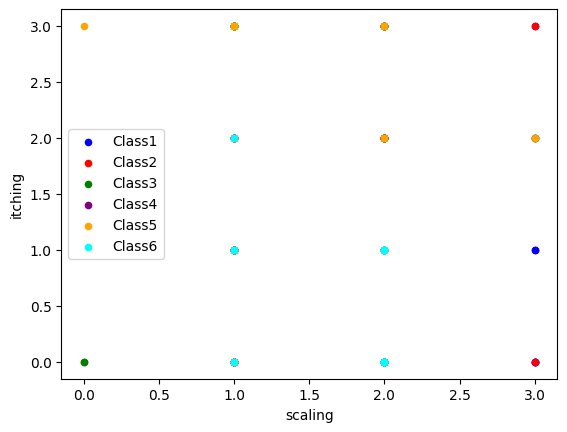

In [18]:
axes=class1.plot(kind='scatter',x='scaling',y='itching',color='blue',label='Class1')
class2.plot(kind='scatter',x='scaling',y='itching',color='red',label='Class2',ax=axes)
class3.plot(kind='scatter',x='scaling',y='itching',color='green',label='Class3',ax=axes)
class4.plot(kind='scatter',x='scaling',y='itching',color='purple',label='Class4',ax=axes)
class5.plot(kind='scatter',x='scaling',y='itching',color='orange',label='Class5',ax=axes)
class6.plot(kind='scatter',x='scaling',y='itching',color='cyan',label='Class6',ax=axes)

In [27]:
X=df.drop('class',axis=1)
y=df['class']

In [28]:
X.shape

(366, 34)

In [29]:
y.shape

(366,)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=4)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(292, 34)
(292,)
(74, 34)
(74,)


In [47]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [48]:
y_pred=classifier.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9459459459459459


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.82      0.93      0.88        15
           3       1.00      1.00      1.00        11
           4       0.75      0.60      0.67         5
           5       1.00      1.00      1.00        11
           6       1.00      0.80      0.89         5

    accuracy                           0.95        74
   macro avg       0.93      0.89      0.91        74
weighted avg       0.95      0.95      0.94        74



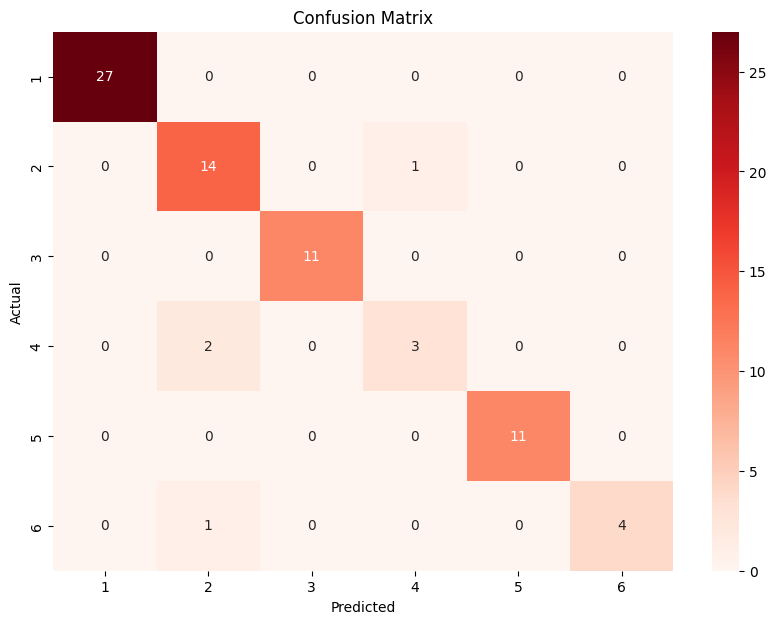

In [52]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
custom_input = np.array([[0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1]])

# Ensure the custom input is the same shape as the training data (should have 34 features)
custom_input_df = pd.DataFrame(custom_input, columns=X.columns)

# Predicting the class for the custom input
custom_prediction = classifier.predict(custom_input_df)

print("Predicted class for the custom input:", custom_prediction[0])

Predicted class for the custom input: 1
